### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing and inspecting the dataset

In [2]:
df = pd.read_csv('GrowLocations.csv')

In [3]:
df.head()

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


### Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x18200aa5130>,
 'caps': [<matplotlib.lines.Line2D at 0x18200aa56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18200a93e20>],
 'medians': [<matplotlib.lines.Line2D at 0x18200aa5c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x18200aa5f40>],
 'means': []}

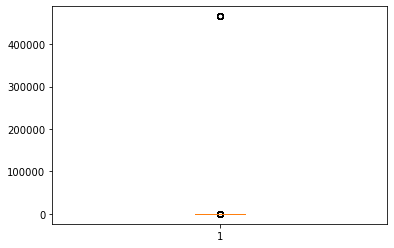

In [6]:
plt.boxplot(df['Latitude']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x18200af8eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x18200b07490>,
 'boxes': [<matplotlib.lines.Line2D at 0x18200af8be0>],
 'medians': [<matplotlib.lines.Line2D at 0x18200b07a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x18200b07d00>],
 'means': []}

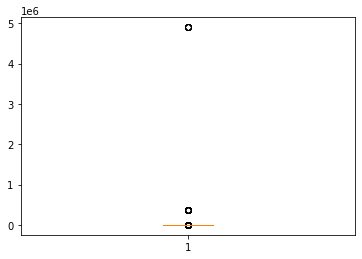

In [7]:
plt.boxplot(df['Longitude']) 

We see that there are some outliers which are abnormally higher than other values. We should remove all values outside the bounding box so that we keep the relevant coordinates and the outliers are also removed. 

### Removing values outside the bounding box range

In [8]:
minLongitude = -10.592
maxLongitude = 1.6848
minLatitude = 50.681
maxLatitude = 57.985
BBox = (minLongitude, maxLongitude, minLatitude, maxLatitude)

In [9]:
# Filter the Longitude values based on the bounding box
df = df[(df['Longitude'] >= minLongitude) & (df['Longitude'] <= maxLongitude)]

In [10]:
# Filter the Latitude values based on the bounding box
df = df[(df['Latitude'] >= minLatitude) & (df['Latitude'] <= maxLatitude)]

In [11]:
#Printing max and min values of both columns
print("Longitude Min " + str(df.Longitude.min()) + '\n' + 
      "Longitude Max " + str(df.Longitude.max()) + '\n' +
      "Latitude Min " + str(df.Latitude.min()) + '\n' + 
      "Latitude Max " + str(df.Latitude.max()) + '\n')

Longitude Min -1.937
Longitude Max -1.933
Latitude Min 53.443
Latitude Max 54.443



The Latitude and Longitude values seem within the range of bounding box values

### Importing the map image

In [12]:
ruh_m = plt.imread('map7.png')

### Plotting the points on the map

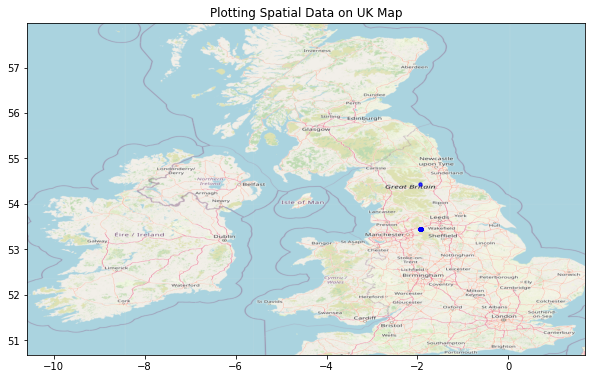

In [13]:
fig, ax = plt.subplots(figsize = (10,16))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, s=10, c='b')
ax.set_title('Plotting Spatial Data on UK Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, extent = BBox, zorder=0, aspect= 'equal') 

The output we get is noweher close to the output required. We get much lesser number of points than what are required on the map. Maybe the column names of Latitude and Longitude are incorrectly named. Let us their names and see what result we get.

In [14]:
#Reading the dataset again
df = pd.read_csv('GrowLocations.csv')

### Swapping column names of Latitude and Longitude

In [15]:
df = df.rename(columns={"Latitude": "Longitude", "Longitude": "Latitude"})

In [16]:
df.head()

,Serial,Longitude,Latitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


Removing values outside the bounding box again

In [17]:
# Filter the Longitude values based on the bounding box
df = df[(df['Longitude'] >= minLongitude) & (df['Longitude'] <= maxLongitude)]

In [18]:
# Filter the Latitude values based on the bounding box
df = df[(df['Latitude'] >= minLatitude) & (df['Latitude'] <= maxLatitude)]

In [19]:
#Printing max and min values of both columns
print("Longitude Min " + str(df.Longitude.min()) + '\n' + 
      "Longitude Max " + str(df.Longitude.max()) + '\n' +
      "Latitude Min " + str(df.Latitude.min()) + '\n' + 
      "Latitude Max " + str(df.Latitude.max()) + '\n')

Longitude Min -8.427
Longitude Max 1.015
Latitude Min 50.729
Latitude Max 56.752



The Latitude and Longitude values seem within the range of bounding box values

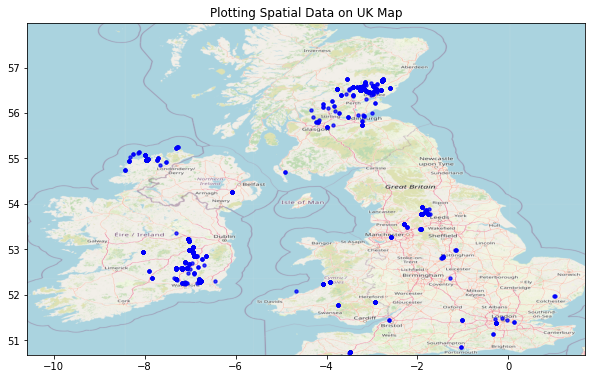

In [20]:
#Plotting the points again
fig, ax = plt.subplots(figsize = (10,16))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, s=10, c='b') 
ax.set_title('Plotting Spatial Data on UK Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, extent = BBox, zorder=0, aspect= 'equal')

We now get the output image almost same as what is required. Exporting this to an image file

In [27]:
# grab the pixel buffer and dump it into a numpy array
X = np.array(fig.canvas.renderer.buffer_rgba())

# saving an image using the imsave function
plt.imsave('Final_Output.jpeg',X)